# About the dataset

imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.

In [2]:
## importing the neccessary modules 
import pandas as pd 
import numpy as np 
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
## importing the dataset 
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
## to check the size of this data 
my_data.shape

(200, 6)

In [5]:
## feature selection 
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [6]:
## decision trees does not recognize categorical data, so we will need to tranfrom this data 
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit(['F', 'M']).transform(X[:, 1])

labelencoder_bp = LabelEncoder()
labelencoder_bp.fit(['LOW', 'NORMAL', "HIGH"])
X[:, 2] = labelencoder_bp.transform(X[:, 2])

labelencoder_chol = LabelEncoder()
labelencoder_chol.fit(['NORMAL', "HIGH"])
X[:, 3] = labelencoder_chol.transform(X[:, 3])

X[0:5]



array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [7]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

### Selecting my training and testing data

In [8]:
## spliting data into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Modeling

In [9]:
## to create an instance of the DecisionTreeClasffier 
drugtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

drugtree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
## to fit our model 
drugtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
## to create predictions for the test 
pred = drugtree.predict(X_test)
print(pred [0:10])
print(y_test [0:10])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
82     drugC
183    drugY
46     drugA
70     drugB
100    drugA
Name: Drug, dtype: object


### Evaluation

In [12]:
# using the accuracy score to evaluate my model 
print ("Test Set Accuracy:", metrics.accuracy_score(y_test, pred))

Test Set Accuracy: 0.9833333333333333


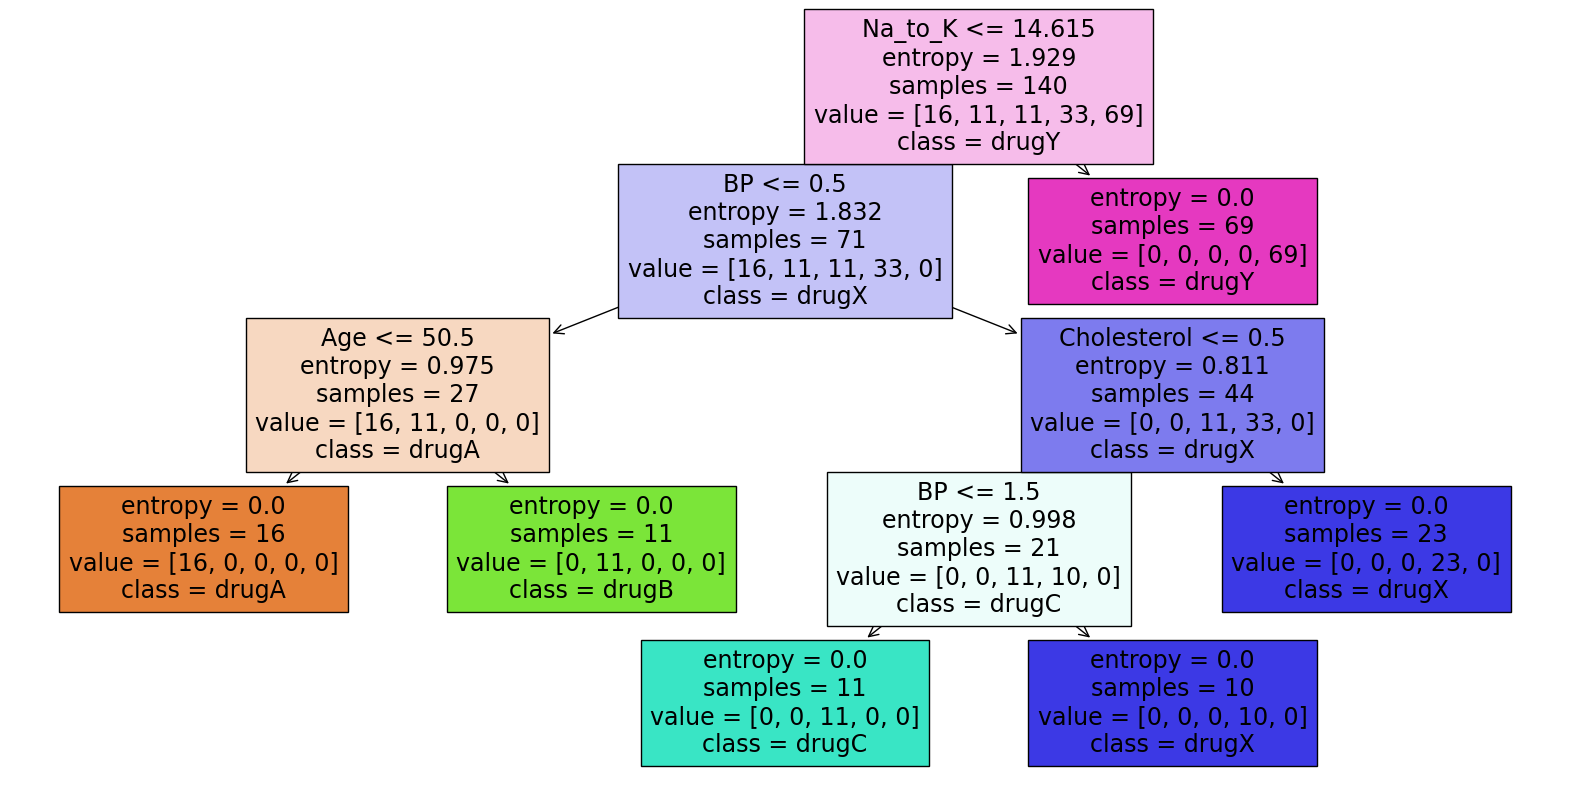

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(drugtree, filled=True, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], class_names=drugtree.classes_)
plt.show()


In [ ]:
import joblib

# Assuming 'model' is your trained Decision Tree classifier
joblib.dump(model, 'decision_tree_model.joblib')
